In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm

In [2]:
df = pd.read_excel('Junior Data Analyst Task.xlsx', sheet_name='RAW_Task2')

In [3]:
df['group'] = df['social'].isna().apply(lambda x: 'A' if x else 'B')
df.head()

,userID,regions,email,album,firstMessage,age,param1,param2,param3,param4,os,social,time_to_first,regDateTime,Conversion,Revenue,group
0,164818468,0,rambler.ru,1,1,30,0.0,0.0,1.0,0.0,android,odnoklassniki,1,2020-01-01 02:18:03,0,100,B
1,165684464,1,yandex.ru,1,1,36,0.0,1.0,0.0,1.0,android,NaN,1,2020-01-01 04:56:24,0,200,A
2,167346466,0,mail.ru,1,1,42,0.0,1.0,1.0,0.0,android,NaN,2,2020-01-01 09:43:43,0,200,A
3,167590460,0,gmail.com,1,1,52,1.0,1.0,1.0,1.0,ios,NaN,6,2020-01-01 10:09:58,1,500,A
4,168218468,0,gmail.com,1,1,49,0.0,1.0,1.0,1.0,windows,facebook,62,2020-01-01 11:12:16,0,200,B


## Приносят ли соцсети больше денег?

In [4]:
df.groupby('group').Revenue.sum()

group
A    1645900
B    1443800
Name: Revenue, dtype: int64

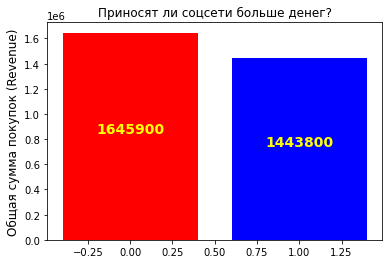

In [5]:
fig, ax = plt.subplots(figsize=(6,4))

x = [0, 1]
y = [df[df.group=='A'].Revenue.sum(), df[df.group=='B'].Revenue.sum()]

ax.bar(x, y, align='center', color=['r','b'])
ax.set_alpha(0.8)
ax.set_title("Приносят ли соцсети больше денег?", fontsize=12)
ax.set_ylabel("Общая сумма покупок (Revenue)", fontsize=12)

for xx, yy in zip(x, y):
    ax.text(xx, yy*0.5, yy,ha='center', va='bottom', fontdict={'size':14,'weight':'bold','color':'yellow'})
    
#Рассматрия каждую группу отдельно, видим, что соцсети не приносят больше денег

## Приносят ли соцсети больше вторых конверсий?

In [6]:
df.groupby('group').Conversion.sum()

group
A    1909
B    1662
Name: Conversion, dtype: int64

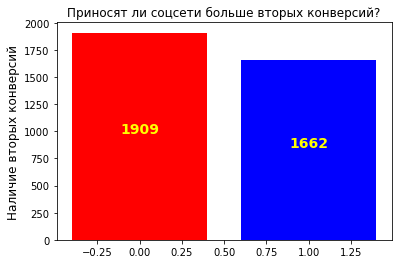

In [7]:
fig, ax = plt.subplots(figsize=(6,4))

x = [0, 1]
y = [df[df.group=='A'].Conversion.sum(), df[df.group=='B'].Conversion.sum()]

ax.bar(x, y, align='center', color=['r','b'])
ax.set_alpha(0.8)
ax.set_title("Приносят ли соцсети больше вторых конверсий?", fontsize=12)
ax.set_ylabel("Наличие вторых конверсий", fontsize=12)

for xx, yy in zip(x, y):
    ax.text(xx, yy*0.5, yy,ha='center', va='bottom', fontdict={'size':14,'weight':'bold','color':'yellow'})
    
#Рассматрия каждую группу отдельно, видим, что соцсети не приносят больше вторых конверсий

# AB тестирование: увеличился ли Conversion Rate и ARPU?

In [8]:
dfA = df[df.group=='A']
dfB = df[df.group=='B']

## Conversion Rate

Пускай $CR_A$, $CR_B$ — Conversion Rate каждой из групп. 

Выдвигаются следующие гипотезы с критическим уровнем $\alpha = 0.05$ (уровень значимости 95%):

$H_0$: $CR_B = CR_A$ (или $CR_B <= CR_A$)

$H_1$: $CR_B > CR_A$

In [9]:
CR_A = dfA.Conversion.mean()
CR_B = dfB.Conversion.mean()
n_A = dfA.Conversion.size
n_B = dfB.Conversion.size
print('Conversion Rate And Sample Size For Each Group:')
CR_A, CR_B, n_A, n_B

Conversion Rate And Sample Size For Each Group:


(0.4423076923076923, 0.43829113924050633, 4316, 3792)

In [10]:
#размеры выборок больше чем 30, поэтому можно использовать z-test вместо t-test (st.ttest_ind)

alpha = 0.05
z_score, p_value = sm.stats.proportions_ztest([CR_A, CR_B], [n_A, n_B])
print('z_score: {0}, p_value: {1}'.format(abs(z_score), p_value/2))

z_score: 0.056487566752332546, p_value: 0.4774767000025714


### z_score < 1.65 для уровня значимости 95% (а так же p_value > 0.05), поэтому мы не можем отклонить нулевую гипотезу о том, что Conversion Rate не изменился (меньше либо равно).

## ARPU

Пускай $ARPU_A$, $ARPU_B$ — Average Revenue Per User каждой из групп. 

Выдвигаются следующие гипотезы с критическим уровнем $\alpha = 0.05$ (уровень значимости 95%):

$H_0$: $ARPU_B = ARPU_A$ (или $ARPU_B <= ARPU_A$)

$H_1$: $ARPU_B > ARPU_A$

In [11]:
ARPU_A = dfA.Revenue.mean()
ARPU_B = dfB.Revenue.mean()
n_A = dfA.Revenue.size
n_B = dfB.Revenue.size
print('ARPU And Sample Size For Each Group:')
ARPU_A, ARPU_B, n_A, n_B

ARPU And Sample Size For Each Group:


(381.34847080630215, 380.7489451476793, 4316, 3792)

In [12]:
#размеры выборок больше чем 30, поэтому можно использовать z-test вместо t-test (st.ttest_ind)

alpha = 0.05
z_score, p_value = sm.stats.proportions_ztest([ARPU_A, ARPU_B], [n_A, n_B])
print('z_score: {0}, p_value: {1}'.format(abs(z_score), p_value/2))

z_score: 1.8554405937372414, p_value: 0.03176666754826487


### z_score > 1.65 для уровня значимости 95% (а так же p_value = 0.03 < 0.05), поэтому мы можем отклонить нулевую гипотезу и принять альтернативную гипотезу о том, что ARPU увеличился.